In [5]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import tifffile 

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from skimage.transform import resize

np.random.seed(1)

In [6]:
train_images = [] 
train_labels0 = [] 
shape = (512, 512)

train_path = '../data/Training/'

for root, dirs, files in os.walk(train_path):
    for f in files:
        if f.endswith(".tif"):
            filepath = os.path.join(root, f)
            classlabel = Path(filepath).parents[1]
          
            img = tifffile.imread(filepath)
            image_reshaped = resize(img, shape, preserve_range=True)
            
            train_images.append(image_reshaped)
            train_labels0.append(classlabel)        

In [7]:
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels0).values

# Converting train_images to array
train_images = np.array(train_images)
train_images = train_images.reshape(len(train_images), shape[0], shape[1], 1)

# Splitting Training data into train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)

In [13]:
print(len(train_images))
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

48
(38, 512, 512, 1)
(10, 512, 512, 1)
(38, 3)
(10, 3)


In [12]:
# Visualizing Training data
indx = np.random.randint(0, len(train_images))

print(indx)
print(train_labels[indx])
plt.imshow(train_images[indx], cmap="gray")

8
[0 0 1]


In [104]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(512,512,1,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(3,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

In [105]:
# Training the model
history = model.fit(x_train,y_train,epochs=10,batch_size=8,validation_data=(x_val,y_val), callbacks=[es])

Train on 38 samples, validate on 10 samples
Epoch 1/10
38/38 [==============================] - 16s 431ms/step - loss: 8.7601 - acc: 0.2895 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/10
38/38 [==============================] - 17s 435ms/step - loss: 11.8765 - acc: 0.2632 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 3/10
38/38 [==============================] - 16s 433ms/step - loss: 11.8765 - acc: 0.2632 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/10
38/38 [==============================] - 17s 444ms/step - loss: 11.8765 - acc: 0.2632 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 5/10
38/38 [==============================] - 17s 458ms/step - loss: 11.8765 - acc: 0.2632 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 6/10
38/38 [==============================] - 18s 461ms/step - loss: 11.8765 - acc: 0.2632 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 00006: early stopping


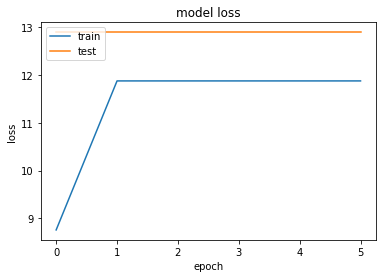

In [106]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

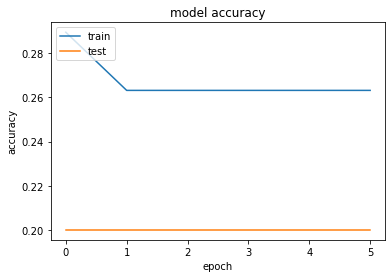

In [107]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()